In [69]:
import sys
sys.path.insert(0, r'/Users/admin/Documents/MachineLearning')

In [70]:
from ridge_regression import RidgeRegression
import pandas as pd
import numpy as np

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from regression import Regression

class RidgeRegression(Regression):
    """
    Inittialize parameter
        _fit_intercept: allow to train intercept
    """
    def __init__(self, use_intercept=True, regulization=0.01):
        self._fit_intercept = use_intercept
        self._t = regulization
    """
    Training method (IRLS)
    Parameter
    --------
        X: sample features
        y: label
        ilters: Number of ilterations
    return
    --------
        beta: parameters
    """
    def fit(self, X, y, ilters=10, lr=0.01):
        logs = []
        self.y = y
        self.X = X
        self.m_samples = X.shape[0]
        self.n_features = X.shape[1]
        self._random_init_parameter(X.shape[1])
        #iteratively reweighted least squares
        for il in range(ilters):
            dW, db = self._get_gradient()
            self.W = self.W - lr * dW
            self.b = self.b - lr * db
            loss = self._get_loss()
            logs.append(loss)
        return logs

    def _get_gradient(self):
        if  self._fit_intercept:
            prop = np.dot(self.X, self.W.T) + self.b 
        else:
            prop = np.dot(self.X, self.W.T)
        error = prop - self.y
        dW = np.random.randn(1, self.n_features)
        db = np.random.rand(1, 1) 
        dW = (np.dot(error.T, self.X) + self.W * self._t) * (1/self.m_samples)
        db = (np.sum(error) + self._t) *  (2/self.m_samples)

        return dW, db

    def _get_loss(self):
        if self._fit_intercept:
            prob = np.dot(self.X, self.W.T) + self.b
        else:
            prob = np.dot(self.X, self.W.T)
        total_cost = (0.5 / self.m_samples) * (np.sum(self.y - prob)**2) + self._t * (np.sum((self.W )**2)+ (self.b[0, 0])**2)
        return total_cost

    """
    Method using to predict probabilty.
    In case of two class, method return probabilty of samples goes into True class
    http://personal.psu.edu/jol2/course/stat597e/notes2/logit.pdf
    """
    def predict(self, X): 
        y_p = np.dot(X, self.W.T) + self.b
        return y_p

    def evaluate(X, y):
        return

        # Init parameter
    def _random_init_parameter(self, feature_shape):
        np.random.seed(1)
        if self._fit_intercept:
            self.W = np.random.randn(1, feature_shape)
            self.b = np.random.rand(1, 1) 
        else:
            self.b = np.random.randn(1, feature_shape) 
        


In [71]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [72]:
df.dropna(inplace=True)

In [73]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [74]:
df.keys()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [75]:
len(df.index)

6825

In [76]:
df.Developer.value_counts()

EA Canada                             149
EA Sports                             142
Capcom                                126
Ubisoft                               103
Konami                                 95
                                     ... 
Sanzaru Games, Sanzaru Games, Inc.      1
SCEA, Think and Feel                    1
Ubisoft Annecy                          1
Omega Force, Koei Canada                1
Atomic Games                            1
Name: Developer, Length: 1289, dtype: int64

In [101]:
# df.Developer.hist()

In [78]:
df.Genre.value_counts()

Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

<AxesSubplot: >

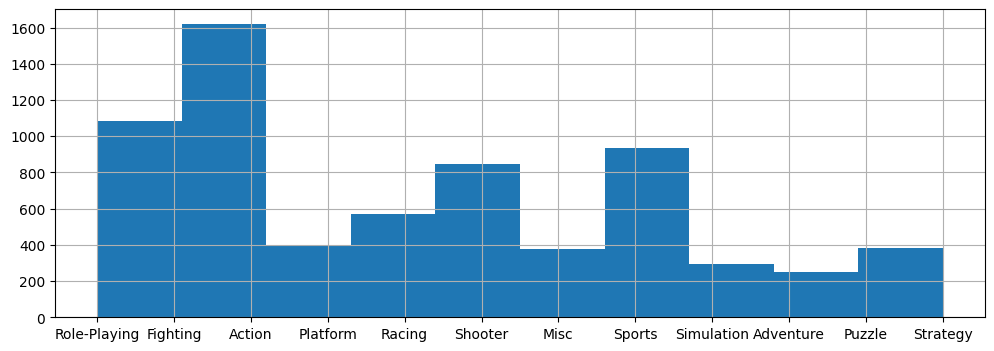

In [111]:
df.Genre.hist(figsize=(12, 4))

In [79]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


<AxesSubplot: >

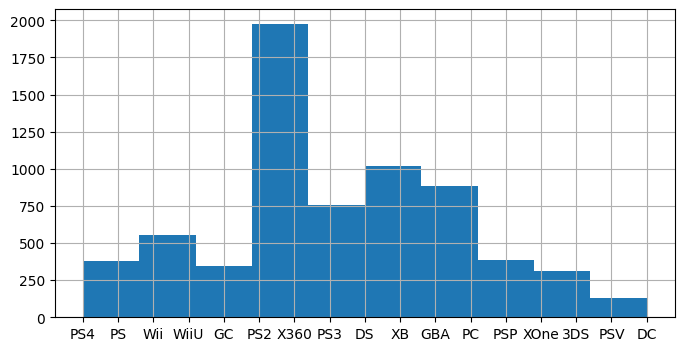

In [109]:
df.Platform.hist(figsize=(8, 4))

In [81]:
df[df['Global_Sales'] > 30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [82]:
gs = df['Global_Sales'].quantile(0.99)

In [83]:
df = df[df['Global_Sales'] < gs]

https://www.kaggle.com/code/residentmario/ridge-regression-with-video-game-sales-prediction

In [84]:
df['User_Score'] = df['User_Score'].apply(float)

In [85]:
pb = df['Publisher'].value_counts()


In [86]:
df['Publisher'] = df['Publisher'].apply(lambda s: s if s not in pb[20:] else 'others')

In [87]:
dev = df['Developer'].value_counts()

In [88]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in dev[20:] else 'others')

In [89]:
X_cat = df[['Platform', 'Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Global_Sales']

In [92]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
105,1.797863,1.222094,1.548409,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
106,-2.239604,1.873578,-0.719392,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
107,-0.339619,1.801190,2.339502,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,-2.239604,1.511642,-0.877611,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
110,1.560365,1.294481,2.814158,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [94]:
y_train = np.expand_dims(y_train, axis=1)

In [95]:
model = RidgeRegression()
logs= model.fit(X_train, y_train, ilters=200)

In [96]:
import matplotlib.pyplot as plt

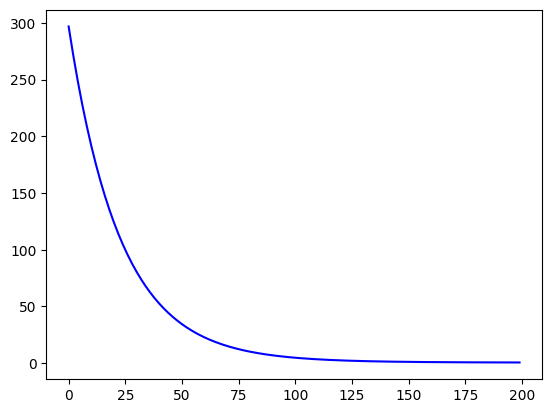

In [97]:
plt.plot(range(len(logs)), logs, '-b', label='loss')
plt.savefig("loss_gd")
plt.show()

In [98]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [99]:
predictions = model.predict(X_test)

In [100]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmsle = np.log(np.sqrt(mean_squared_error(y_test, predictions)))

print('Mean Absolute Error')
print('MAE: ', mae)

print('\nMean Squared Error')
print('MSE: ', mse)

print('\nRoot Mean Squared Error')
print("RMSE: ", rmse)

print('\nRoot Mean Squared Log Error ')
print("RMSLE: ", rmsle)

Mean Absolute Error
MAE:  1.1158546029683676

Mean Squared Error
MSE:  2.140161944603761

Root Mean Squared Error
RMSE:  1.4629292343116809

Root Mean Squared Log Error 
RMSLE:  0.3804407506095172
